In [ ]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
%matplotlib inline
# Import library untuk Clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
data = pd.read_csv('dataset_rev_02.csv',sep=";")

In [ ]:
data.head()

,NO,#,Address,SSID,Channel,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,Radio_Name,RouterOS_Version
0,1,0,08:55:31:5C:F9:7C,test123,5110/20-Ce/an,5110,-76,-115,39,0855315CF97C,6.49.6
1,2,1,E0:63:DA:D4:F8:CC,NaN,5110/20-eeCe/ac,5110,-59,-115,56,NaN,NaN
2,3,2,2C:C8:1B:40:C6:F5,SERSER,5125/20-Ce/an,5125,-66,-115,49,2CC81B40C6F5,6.46.8
3,4,3,74:83:C2:5C:84:F6,ubnt cpp,5150/20/an,5150,-59,-114,55,Tasya Media Ne,2.9.31
4,5,4,08:55:31:87:B5:6C,NYANYA 120,5150/20/an,5150,-86,-114,28,08553187B56C,NaN


In [ ]:
data.isnull().any()

NO                  False
#                   False
Address             False
SSID                 True
Channel             False
Head_Channel        False
Signal_Strength     False
Noise_Floor         False
Signal_To_Noise     False
Radio_Name           True
RouterOS_Version     True
dtype: bool

In [ ]:
data = data.drop_duplicates()
data

,NO,#,Address,SSID,Channel,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,Radio_Name,RouterOS_Version
0,1,0,08:55:31:5C:F9:7C,test123,5110/20-Ce/an,5110,-76,-115,39,0855315CF97C,6.49.6
1,2,1,E0:63:DA:D4:F8:CC,NaN,5110/20-eeCe/ac,5110,-59,-115,56,NaN,NaN
2,3,2,2C:C8:1B:40:C6:F5,SERSER,5125/20-Ce/an,5125,-66,-115,49,2CC81B40C6F5,6.46.8
3,4,3,74:83:C2:5C:84:F6,ubnt cpp,5150/20/an,5150,-59,-114,55,Tasya Media Ne,2.9.31
4,5,4,08:55:31:87:B5:6C,NYANYA 120,5150/20/an,5150,-86,-114,28,08553187B56C,NaN
...,...,...,...,...,...,...,...,...,...,...,...
451,559,169,08:55:31:0B:4F:BD,AP72,5360/20/an,5360,-91,-114,23,AP GASPOL,6.45.9
452,561,170,74:4D:28:E7:F6:A7,i-ACCESS-5G,5220/20-eC/ac,5220,-88,-113,25,METAL-52AC,7.1.5
453,562,171,C4:AD:34:9B:27:DD,i-ACCESS-5G,5300/20-eC/ac,5300,-86,-113,27,MANTBOX,6.48.6
454,563,172,C4:AD:34:8B:28:C4,SPEEDNET TO RAMPOK,5535/20/an,5535,-90,-115,25,SPEEDNET PENDAWA,6.45.9


In [ ]:
# Hilangkan Variabel yang Tidak Perlu
data = data.drop(['#','Address','SSID','Channel','Radio_Name','RouterOS_Version'], axis = 1)
data

,NO,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise
0,1,5110,-76,-115,39
1,2,5110,-59,-115,56
2,3,5125,-66,-115,49
3,4,5150,-59,-114,55
4,5,5150,-86,-114,28
...,...,...,...,...,...
451,559,5360,-91,-114,23
452,561,5220,-88,-113,25
453,562,5300,-86,-113,27
454,563,5535,-90,-115,25


In [ ]:
data.to_excel("drop_data.xlsx", index=False) 

In [ ]:
# Memeriksa Kolom Non-Numerik
cat_columns = data.columns[(data.dtypes =='object').values].tolist()
cat_columns

[]

In [ ]:
# Memeriksa Kolom Numerik
data.columns[(data.dtypes !='object').values].tolist()

['NO', 'Head_Channel', 'Signal_Strength', 'Noise_Floor', 'Signal_To_Noise']

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

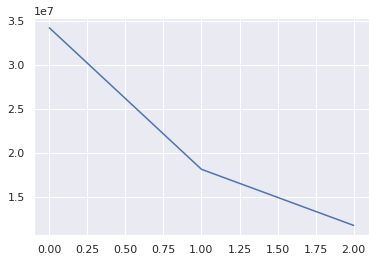

In [ ]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [1, 2, 3]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4286134444178901
For n_clusters=3, the silhouette score is 0.4078468631049233
For n_clusters=4, the silhouette score is 0.41520422613837016


In [ ]:
# Final model with k=2
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Assign the label
data['cluster'] = kmeans.labels_
data.head()

,NO,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,cluster
0,1,5110,-76,-115,39,1
1,2,5110,-59,-115,56,1
2,3,5125,-66,-115,49,1
3,4,5150,-59,-114,55,1
4,5,5150,-86,-114,28,1


In [ ]:
total_rows = data['Head_Channel'].count
data

,NO,Head_Channel,Signal_Strength,Noise_Floor,Signal_To_Noise,cluster
0,1,5110,-76,-115,39,1
1,2,5110,-59,-115,56,1
2,3,5125,-66,-115,49,1
3,4,5150,-59,-114,55,1
4,5,5150,-86,-114,28,1
...,...,...,...,...,...,...
451,559,5360,-91,-114,23,0
452,561,5220,-88,-113,25,0
453,562,5300,-86,-113,27,0
454,563,5535,-90,-115,25,0


In [ ]:
data.shape

(456, 6)

In [ ]:
data = data.loc[:,~data.columns.duplicated('Channel')]

In [ ]:
#data.to_csv("dataset-cluster.csv", index=False)
data.to_excel("cluster_data.xlsx", index=False) 

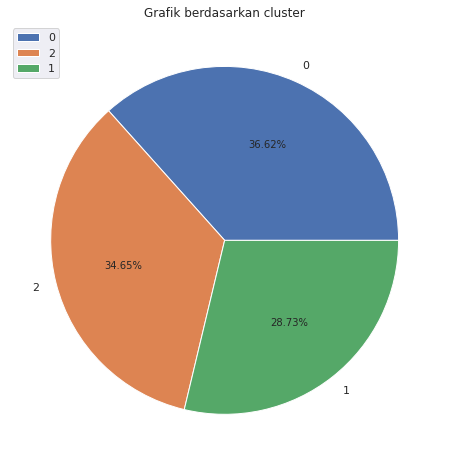

In [ ]:
# Grafik ini menunjukkan bahwa pengguna frekuensi berdasarkan cluster
plt.figure(figsize = (8,8))
plt.pie(data['cluster'].value_counts(), labels=data['cluster'].value_counts().index, autopct='%3.2f%%')
plt.title('Grafik berdasarkan cluster')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data)

In [ ]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 2 0 2 2 0 2 1 1 2 2 2 2 2 2 2 2 1 1 2 1 1 2
 2 2 2 1 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 2 1
 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 1 2 2 2 2 1 2 2 1 2
 2 2 1 1 2 1 1 2 2 2 2 2]


In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label2 = data[label == 0]
 
filtered_label8 = data[label == 2]

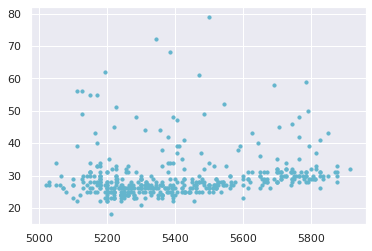

In [ ]:
plt.scatter(data.Head_Channel , data.Signal_To_Noise, s =10, c = 'c', marker = 'o', alpha = 1)
plt.show()

In [ ]:
x_array = np.array(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.10055866, 0.31034483, 0.72727273, 0.3442623 ,
        0.        ],
       [0.00177305, 0.10055866, 0.60344828, 0.72727273, 0.62295082,
        0.        ],
       [0.0035461 , 0.11731844, 0.48275862, 0.72727273, 0.50819672,
        0.        ],
       ...,
       [0.99468085, 0.31284916, 0.13793103, 0.90909091, 0.14754098,
        1.        ],
       [0.9964539 , 0.57541899, 0.06896552, 0.72727273, 0.1147541 ,
        1.        ],
       [1.        , 0.59217877, 0.18965517, 0.63636364, 0.24590164,
        1.        ]])

In [ ]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [ ]:
print(kmeans.cluster_centers_)

[[ 7.22349403e-01  2.82335054e-01  1.11741598e-01  7.94016110e-01
   1.43390745e-01  1.00000000e+00]
 [ 2.08211237e-01  3.21379587e-01  1.68800330e-01  7.68100163e-01
   2.02316678e-01 -1.16573418e-15]
 [ 4.77505279e-01  7.58539810e-01  1.29639379e-01  4.44136017e-01
   2.23501439e-01  5.00000000e-01]]


In [ ]:
data['kluster'] = kmeans.labels_

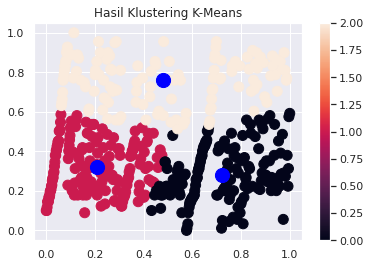

In [ ]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = data.kluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()